# Imports

In [26]:
import os, sys, glob, gc

from datetime import datetime, timedelta
import numpy as np

from read_matlab_data import DataFile
from organize_data import load_object

from scipy import interpolate

import matplotlib.pyplot as plt
from skimage.transform import rescale, resize

# Data Analysis

## File List

Loading all 2019 files that contain link information at 14.3644 MHz.

In [2]:
file_list = load_object("data\\2019\\2019_14p3644.dat")

## One File

In [3]:
data_file = file_list[0]
vars(data_file)

{'file_path': 'D:\\OneDrive - University of Calgary\\All Projects\\nrcan_data\\matlab_files\\2019\\ddAle_Ott_20190720_14364400.mat',
 'data_dic': {'antindf': array([175, 175, 175, 175,   0, 175,   0, 175], dtype=uint8),
  'azimuth': array([191.50514604, 216.43512868, 211.61009272, 207.16897339,
          72.65682887, 184.41860091,  62.86301737,  53.66626571,
         202.27743117,  64.04606078,  60.62845587,  59.342674  ,
          60.04496692, 191.03062618,  70.53299976,  63.05381028,
          64.16061781,  64.22563088,  62.23702668, 213.42734996,
          63.72394069,  60.0725212 ,  91.65063039,  65.96469867,
          68.83500913,  62.34978763,  61.58136138,  63.18626882,
          62.75775923,  62.89187276,  69.61187221, 208.31466797,
          62.74712578,  71.31004583, 220.06533919,  59.24224167,
          60.56496753, 217.72333931,  65.07488526, 213.44083847,
          61.25749653,  62.57139038,  65.9210122 ,  61.26242995,
         208.92894678,  67.76700624, 214.66491768, 217

## Time Data

In [4]:
date = data_file.date_time
print(date)

time_of_day = data_file.data_dic['timeday']
print(time_of_day)
print(time_of_day.shape)


2019-07-20 00:00:00
[737626.69190972 737626.69885417 737626.70059028 737626.70232639
 737626.7040625  737626.70579861 737626.70753472 737626.70927083
 737626.71100694 737626.71274306 737626.71447917 737626.71621528
 737626.71795139 737626.7196875  737626.72142361 737626.72315972
 737626.72489583 737626.72663194 737626.72836806 737626.73010417
 737626.73184028 737626.73357639 737626.7353125  737626.73704861
 737626.73878472 737626.74052083 737626.74225694 737626.74399306
 737626.74572917 737626.74746528 737626.74920139 737626.7509375
 737626.75267361 737626.75440972 737626.75614583 737626.75788194
 737626.75961806 737626.76135417 737626.76309028 737626.76482639
 737626.7665625  737626.76829861 737626.77003472 737626.77177083
 737626.77350694 737626.77524306 737626.77697917 737626.77871528
 737626.78045139 737626.7821875  737626.78392361 737626.78565972
 737626.78739583 737626.78913194 737626.79086806 737626.79260417
 737626.79434028 737626.79607639 737626.7978125  737626.79954861
 73762

In [5]:
time_of_day = time_of_day.ravel()
time_of_day

array([737626.69190972, 737626.69885417, 737626.70059028, 737626.70232639,
       737626.7040625 , 737626.70579861, 737626.70753472, 737626.70927083,
       737626.71100694, 737626.71274306, 737626.71447917, 737626.71621528,
       737626.71795139, 737626.7196875 , 737626.72142361, 737626.72315972,
       737626.72489583, 737626.72663194, 737626.72836806, 737626.73010417,
       737626.73184028, 737626.73357639, 737626.7353125 , 737626.73704861,
       737626.73878472, 737626.74052083, 737626.74225694, 737626.74399306,
       737626.74572917, 737626.74746528, 737626.74920139, 737626.7509375 ,
       737626.75267361, 737626.75440972, 737626.75614583, 737626.75788194,
       737626.75961806, 737626.76135417, 737626.76309028, 737626.76482639,
       737626.7665625 , 737626.76829861, 737626.77003472, 737626.77177083,
       737626.77350694, 737626.77524306, 737626.77697917, 737626.77871528,
       737626.78045139, 737626.7821875 , 737626.78392361, 737626.78565972,
       737626.78739583, 7

This suggests that everything before the decimal is just the day. The fraction might be the time of day, as the variable in the raw data is named `timeday`.


In [6]:
next_day_data =  file_list[1]
print(next_day_data.date_time)

n_time_data = next_day_data.data_dic['timeday'].ravel()
print(n_time_data)

2019-07-21 00:00:00
[737627.00267361 737627.00440972 737627.00614583 737627.00788194
 737627.00961806 737627.01135417 737627.01309028 737627.01482639
 737627.0165625  737627.01829861 737627.02003472 737627.02177083
 737627.02350694 737627.02524306 737627.02697917 737627.02871528
 737627.03045139 737627.0321875  737627.03392361 737627.03565972
 737627.03739583 737627.03913194 737627.04086806 737627.04260417
 737627.04434028 737627.04607639 737627.0478125  737627.04954861
 737627.05128472 737627.05302083 737627.05475694 737627.05649306
 737627.05822917 737627.05996528 737627.06170139 737627.0634375
 737627.06517361 737627.06690972 737627.06864583 737627.07038194
 737627.07211806 737627.07385417 737627.07559028 737627.07732639
 737627.0790625  737627.08079861 737627.08253472 737627.08427083
 737627.08600694 737627.08774306 737627.08947917 737627.09121528
 737627.09295139 737627.0946875  737627.09642361 737627.09815972
 737627.09989583 737627.10163194 737627.10336806 737627.10510417
 73762

This makes sense but what is the reference day...?

In [7]:
days_since = int(np.floor(n_time_data[0]))
days_since

737627

In [8]:
print(next_day_data.date_time)
print(datetime(1, 1, 1) + timedelta(days=days_since))

2019-07-21 00:00:00
2020-07-22 00:00:00


Okay. So their reference is year 0, day 0. The begining of time lol.

### Other time data

- TOFLIGHT: Time of flight in [ms].
- TOFMODE: Modelled time of flight [ms]. (as referring to the ray tracing in the paper).

## Power Data

There's `snr`, `snr_dd`, and `sigpow` attributes in the data. All the data have 175 columns (can be though of as entries, and vary with each day and frequency- sometimes we have more/less data in a given day). 

Luckily, a lot of the units here can be verified with Taylor's paper. From the paper, we have the following:

- SNR [dB]
- SIG POW [dBm] (referenced to milli-Watts)
- SNR_DD [dimensionless] -- Has to be related to the probablility **d**ensity **d**istributions in the paper. However, in the paper they are normalized between 0 and 1.

In [9]:
snr = data_file.data_dic['snr']

### Signal Power

By inverting signal power, assuming the units were $dBm$, we can see that the mean value is about $ 4.6 \times 10^{5} \ kW $. In comparison, HAARP outputs ~ $3.6 \times 10^{3} ~ kW$ or ~ $ 95.5 ~ dBm $. It only makes sense that these are referenced to the noise floor, which is confirmed when looking at Taylor's paper: ***he uses negative values***. 

In [10]:
sig_pow = 1e-3*np.power(data_file.data_dic['sigpow']/10, 10)
print(sig_pow[:3], "%.2e" % np.mean(sig_pow))

[4.18521542e+08 3.38566836e+07 9.03023567e+06] 4.61e+08


### SNR_DD

These must be the density distributions that Taylor used in his paper. We can check by reproducing his 2014, 14.36 MHz plot. 


<img src="snr_dd_5mhz.png">

#### Slice one day

In [11]:
files_2014 = load_object("data\\2014\\2014_5p3820.dat")

In [12]:
file = files_2014[0]

file.data_dic['timeday']

array([735600.24104167, 735600.25145833, 735600.99104167])

In [13]:

norm = np.linspace(0, 1, endpoint=True, num=1000)
norm_day = np.linspace(0, 24, endpoint=True, num=1000)

f =  interpolate.interp1d( norm, norm_day  )

In [14]:
time_arr = file.data_dic['timeday']

def strip_day_from_time(day_time):

    return day_time - np.floor(day_time)

time_arr = np.vectorize(strip_day_from_time)(time_arr)
time_arr

array([0.24104167, 0.25145833, 0.99104167])

In [15]:
f(time_arr)

array([ 5.785,  6.035, 23.785])

In [16]:
snr_dd = file.data_dic["snr_dd"]

print(snr_dd)
print(f(time_arr).shape, snr_dd.shape)

[0.49095363 0.58715367 0.57982358]
(3,) (3,)


In [17]:
binned_day = np.arange(0, 24, 0.5 )

def bin_time(time):

    indcs = np.where( np.isclose(time, binned_day, atol=0.3) )[0]

    # Bin OVerlap Condition
    if len(indcs) == 1:
        return binned_day[indcs]
        
    elif len(indcs) > 1:

        # Edge Case
        if indcs[-1] == 47:

            # Use 23.5 hr bin
            return binned_day[indcs[-1]]

        else: return binned_day[indcs[0]]


    return binned_day[indcs] if len(indcs) == 1 else binned_day[indcs[-1]] 

interp_t_arr = f(time_arr)
print(interp_t_arr)
binned_t_arr = np.vectorize(bin_time)(interp_t_arr)
binned_t_arr


[ 5.785  6.035 23.785]


array([ 5.5,  6. , 23.5])

In [18]:
time_slice = np.zeros_like(binned_day)
print(binned_day)
print(binned_t_arr, binned_t_arr.shape)

indcs = np.searchsorted(  binned_day, binned_t_arr, side="left" )

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5]
[ 5.5  6.  23.5] (3,)


In [19]:
indcs

array([11, 12, 47], dtype=int64)

In [20]:
def stack_bins(indcs, time_slice, values_arr):
    """ For values in the same time bin, average them."""

    unique, dup_count = np.unique(indcs, return_counts=True)
    dup = unique[dup_count > 1]

    # If there's duplicates
    means = []
    if len(dup) >= 1:
        
        # Get their mean
        for d in dup:
            i = np.where( np.in1d(indcs, d) )[0]
            mean = np.mean(values_arr[i])
            means.append(mean)        

    # Place values in time slice
    time_slice[indcs] = values_arr
    time_slice[dup] = np.array(means)

    return time_slice

stack_bins(indcs, time_slice, snr_dd)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.49095363, 0.58715367, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.57982358])

#### Put it all together

In [21]:

months = []
for file_indx, file in enumerate(files_2014):

    # Month of year
    month = file.date_time.month
    months.append(month)

    # Repeat previous steps for entire year
    timeday_arr = file.data_dic['timeday']
    
    t_arr = np.vectorize(strip_day_from_time)(timeday_arr)

    interp_t_arr = f(t_arr) 
    binned_t_arr = np.vectorize(bin_time)(interp_t_arr)

    time_slice = np.zeros_like(binned_day)
    indcs = np.searchsorted(  binned_day, binned_t_arr, side="left" )


    snr_dd = file.data_dic["snr_dd"]

    time_slice = stack_bins(indcs, time_slice, snr_dd)

    # Construct image
    if file_indx == 0: time_slices = time_slice
    else: time_slices = np.vstack( (time_slices, time_slice) )

months = np.unique(months)
print(months)

[ 1  2  3  4  5  6  7  8  9 10]


In [22]:
from matplotlib.colors import Normalize

norm = Normalize(vmin=0, vmax=1, clip=True)



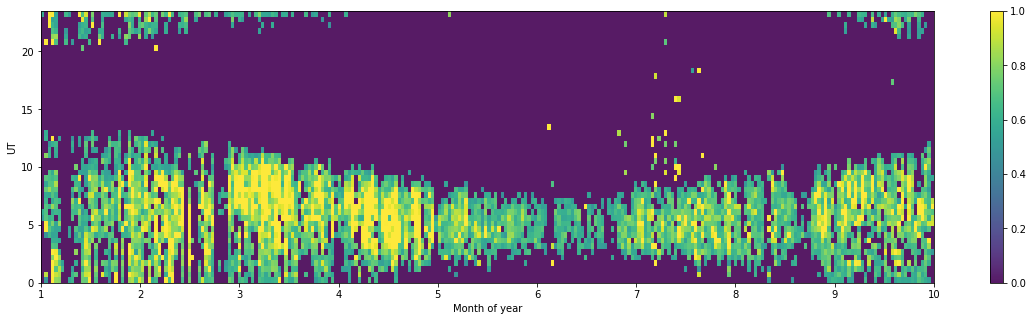

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(20,5) )

xlim = tuple(months[[0, -1]])
ylim = tuple(binned_day[[0, -1]])

im = ax.imshow(np.flipud(time_slices.T), norm=norm, alpha=0.9, extent=[*xlim, *ylim], aspect="auto", interpolation='None', )

ax.set_xlabel(  "Month of year"  )
ax.set_ylabel( "UT")

fig.colorbar(im)

We are very close. After inspecting Taylor's plot closely, I can see that he grouped up the months in roughly 4 bins. Let's try that out.

In [29]:
image = np.flipud(time_slices.T)
x_shape, y_shape = image.shape
print(x_shape, y_shape)

downsize_image = resize( image, (x_shape, y_shape//4), preserve_range=True, order=3, anti_aliasing=True )
print(downsize_image.shape)


48 268
(48, 67)


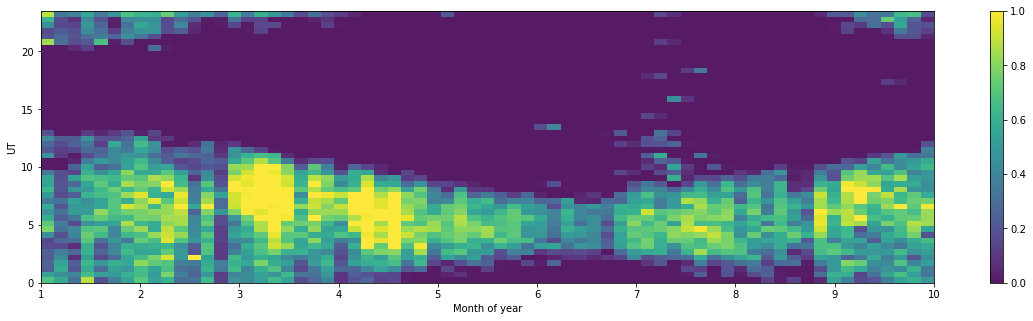

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(20,5) )
im = ax.imshow(downsize_image, norm=norm, alpha=0.9, extent=[*xlim, *ylim], aspect="auto", interpolation='None', )

ax.set_xlabel(  "Month of year"  )
ax.set_ylabel( "UT")

fig.colorbar(im)